# pdb: Debugging in Jupyter notebook with pdb
Pdb is the Python debugger with a simple command-line interface.  With pdb you can manually and sequentially enter commands to do things like inspect variables, set breakpoints, etc. — and this is probably sufficient when it comes to debugging simple analytics.

## Cheatsheet
To start the debugger in a code cell cut and paste the following line of code where you want the debugger to stop or break. **Remember to QUIT using $q$ when you are finished!**

**`from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit`**

The following commands can be used to operate the debugger:

* quit/q: type q  to quit and stop the program execution
* cont/c: Continue to the next breakpoint
* next/n: Go to the next line
* pp/p: Pretty printing/printing a variable
* l: list the code surrounding the current line (where the debugger has stopped)
* step/s: step into a function
* help/h: Displays the list of commands


See the [Python Documentation](https://docs.python.org/3/library/pdb.html) for a complete description of available pdb command.

Happy debugging!


## Example debugging session - setting a breakpoint in your code

PDB can be used to launch a debugging session at designated breakpoints.  For example:

* Use `pdb().set_trace()` to set a breakpoint prior to modifying the value of `theta`.
* Type the variable name to view its value.
* Type `l` to list code surrounding the breakpoint.
* Type `n` to step forward to the next line; check that the variable modified as expected.
* Type `q` to stop the debugger and resume working in the notebook.

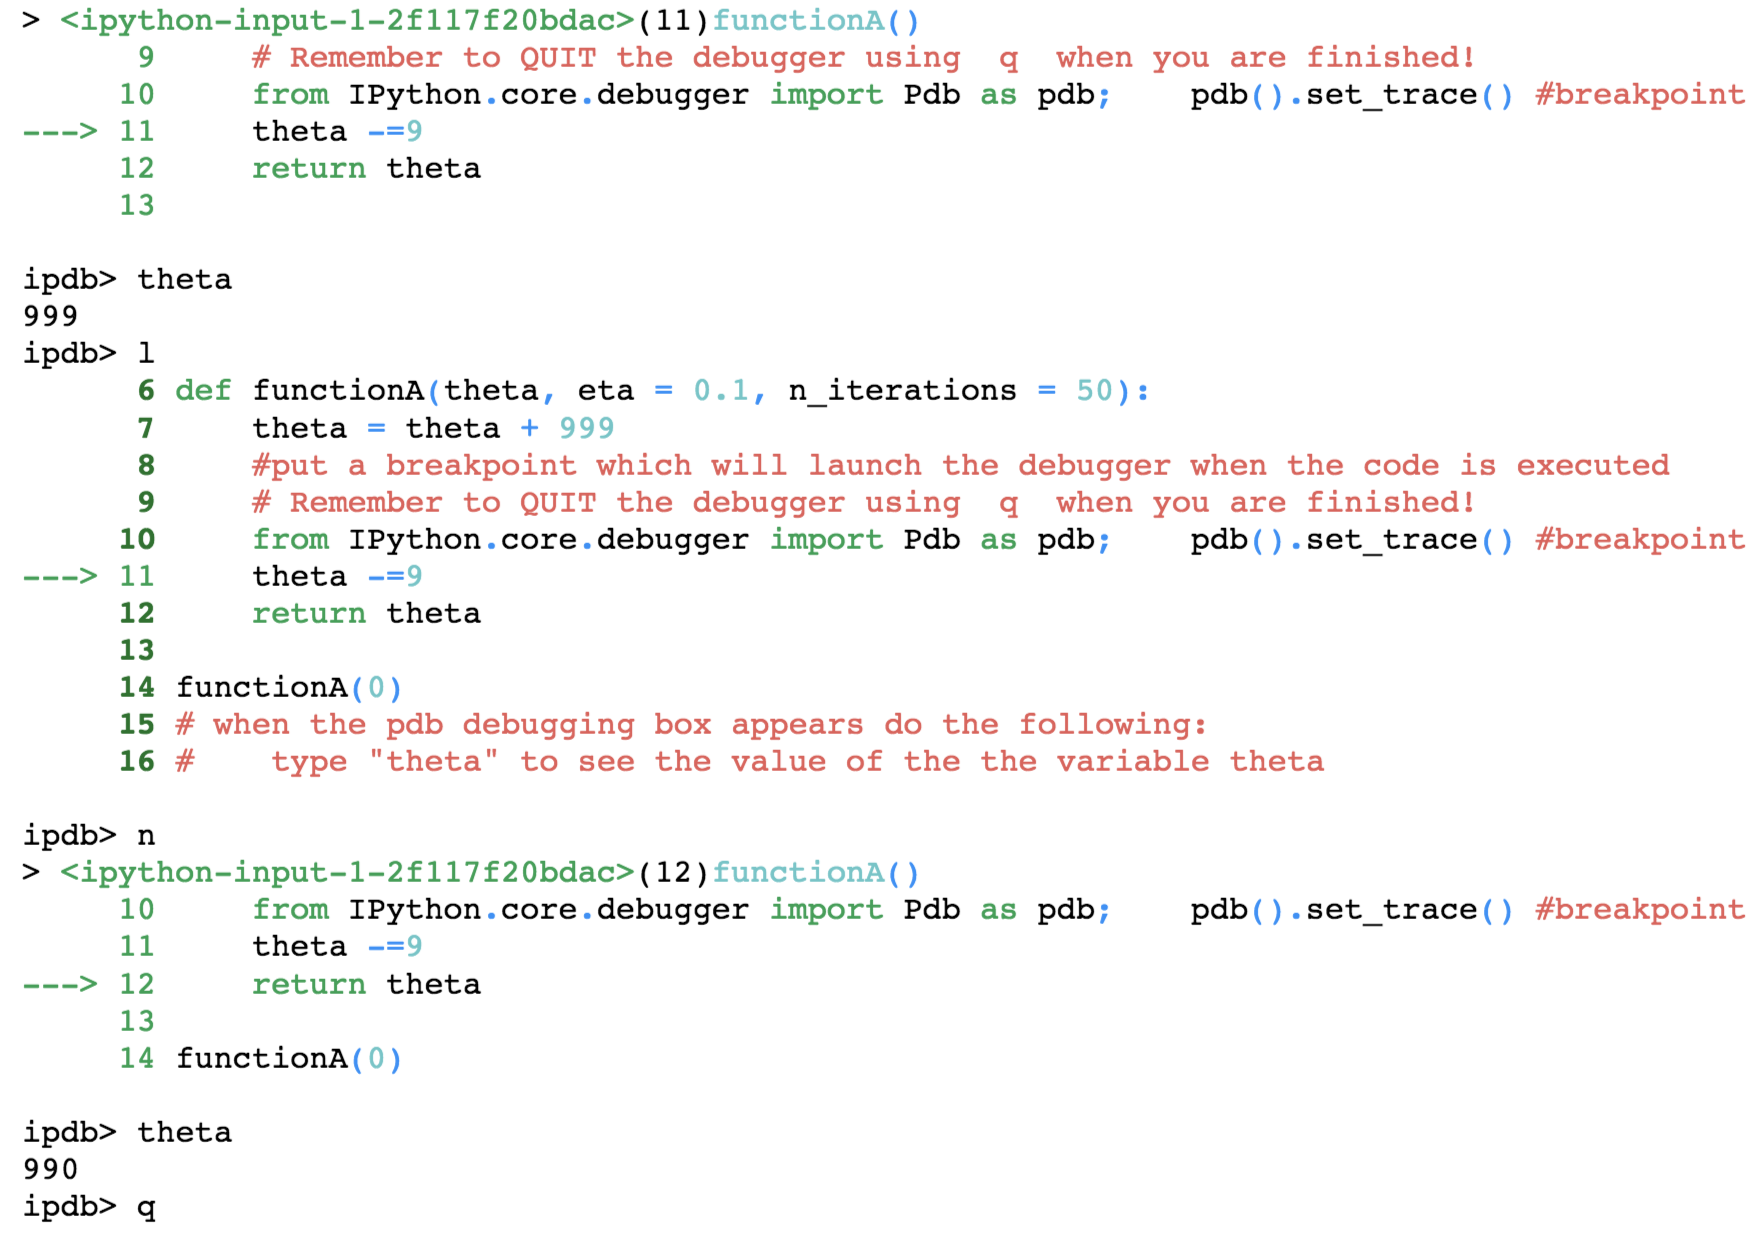

## Example debugging session - launch the debugger automatically

The `%pdb` magic can be used to contriol whether the pdb debugger will launch automatically (i.e., without setting a manual breakpoint). When this feature is on, an interactive pdb debugger will launch after the usual traceback printout. 

###  More control over the state of pdb

Using `%pdb on` or `%pdb 1` will cause the pdb debugger to launch automatically, while `%pdb off` or `%pdb 0` will stop the debugger from launching automatically. If `%pdb` is called without any argument, it works as a toggle (i.e., changes to the opposite of the current state).  The initial state of this feature is set in your configuration file (the option is InteractiveShell.pdb).

###  Activating pdb after an exception occurs

If you want to activate the debugger AFTER an exception has fired, without having to type ‘%pdb on’ and rerunning your code, you can use the `%debug` magic instead of the `%pdb` magic.


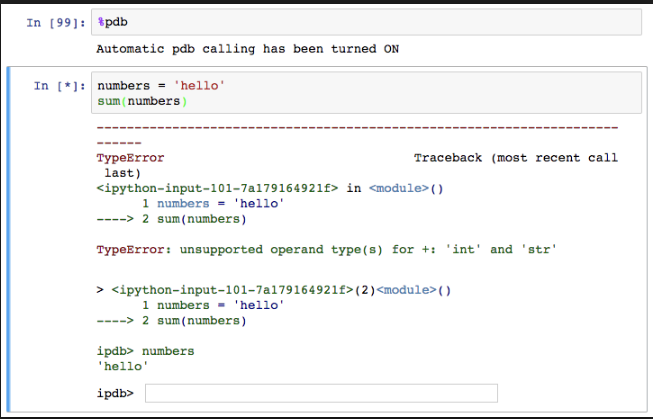

## TASK: Use the debugger to review (fix) the following example

__Remember:__ you must (q)uit pdb debugger to regain control of the notebook.  If you delete the debugger cell while it is running, you will have to restart the notebook kernel, which means losing the current state of your work.  This is a known, but so far unresolved, issue: https://github.com/ipython/ipython/issues/10516

* Run this cell, then...
* Use the debugger to find and fix the error.

**HINT:** uncomment line 8 and re-run the cell to activate the debugger.

In [5]:
# we want to divide each even number (between one and 10) by 2
# we are not triggering an exception
# but we are not getting the expected results either

import numpy as np
evens = list(range(1,10,2))
evens = np.array(evens)
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
y = evens/2
print(y)


[0.5 1.5 2.5 3.5 4.5]


## pdb will step through code in the order it is executed
Remember, there are three ways to continue execution after a breakpoint...
* cont/c: Continue to the next breakpoint
* next/n: Go to the next line
* step/s: step into a function

### Experiment with these methods to step through the following code

In [ ]:
from IPython.core.debugger import Pdb as pdb
%pdb on

def testFunc1(t1):
    a = 1
    t2 = t1 + 3
    pdb().set_trace()  # breakpoint #2 in the execution order
    t2 +=2
    pdb().set_trace()   # breakpoint #3 in the execution order
    return(a)

def test(b):
    a = 1
    a = b + 3
    pdb().set_trace() # breakpoint #1 in the execution order
    x = testFunc1(a)
    a = x + 3
test(2)

### The %debug magic can activate pdb after an error occurs.
This is useful if pdb was off at the time the error ocurred. Run the following three cells for demonstration:

In [ ]:
# turn the debugger off so it doesn't launch automatically
%pdb 0  

In [ ]:
x = 0
y = 4/x

In [ ]:
# activate the debugger after an error occur has occurred
%debug

**NOTE:** A warning (as opposed to an exception) will not trigger the debugger automatically and will not be recognized by the %debug magic, so you must use a breakpoint to activate the debugger for this type of "error".

Compare the division by zero "exception" above with the "warning" below.

In [ ]:
x = list(range(5))
x = np.array(x)
y = 4/x
print(y)

In [ ]:
# this will not help because no exception was thrown - you must set a breakpoint and rerun the code
%debug

# Pixie debugger


[PixieDebugger](https://medium.com/ibm-watson-data-lab/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62) is a visual Python debugger built as a PixieApp., and includes a source editor, local variable inspector, console output, the ability to evaluate Python expressions in the current context, breakpoints management, and a toolbar for controlling code execution.


## Installation
If you have not installed pixiedust, you can do so by typing `pip install pixiedust` in a console window or by running the cell below.  **This only has to be done once.**

In [ ]:
!pip install pixiedust

## Using PixieDebugger

### You must import the pixiedust module before you can use PixieDebugger

In [1]:
import pixiedust

Pixiedust database opened successfully


### Use the %%pixie_debugger cell magic to debug the current cell
This will activate the graphical debugger and allow you to set breakpoints, step through code, examine variables, etc. 
* Run the following cell to see how we can use pixie_debugger as an alternative to pdb().set_trace() as implemented in Section 1.3.2.
* Set breakpoints by clicking in the gutter to the left of line numbers 7, 8 and 13 (a red icon will appear with each click).
* Click the first icon in the menubar to step through these breakpoints.

Breakpoints can also be set by entering line numbers in the cell magic code (e.g., %%pixie_debugger -b 7, 8, 13). 
**NOTE: the cell magic expands from one line to three in the graphical debugger, so you must add two to whatever line number you are trying to select in your original code**.


In [ ]:
%%pixie_debugger

def testFunc1(t1):
    a = 1
    t2 = t1 + 3 # breakpoint #2 in the execution order  
    t2 +=2 # set breakpoint #3 here
    return a  

def test(b):
    a = 1
    a = b + 3 # breakpoint #1 in the execution order
    x = testFunc1(a)
    a = x + 3
    return a
    
test(2)

### Quit hasn't been implemented yet!!  Coming soon.


## Use the %pixie_debugger line magic to invoke the debugger after an error has occurred
This works similar to the %debug magic

In [ ]:
x = 0
y = 4/x

In [ ]:
# Launch pixie debugger retroactively to allow you to debug just before the crash 
%pixie_debugger

## References
For more more examples using PixieDebugger, including additional options, please see [here](https://medium.com/ibm-watson-data-lab/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62).